# PROJECT TITLE - Zomato_Project


## Project Type - EDA + Unsupervised Machine Learning (Clustering)

### Name - Saravanan.K

### Project Summary

#### Introduction
The rapid growth of online food delivery platforms in India has revolutionized the restaurant industry. Zomato, a leading Indian food aggregator, plays a crucial role in connecting customers with restaurants by providing information, reviews, and delivery services. With increasing competition and customer expectations, businesses need data-driven insights to improve service quality and enhance customer satisfaction. This project aims to analyze Zomato restaurant data, extract meaningful insights, cluster restaurants into distinct segments, and perform sentiment analysis on customer reviews. Such analysis helps customers find the best options and assists Zomato in improving its offerings and pricing strategies.

Objectives
Perform Exploratory Data Analysis (EDA) to understand the distribution of restaurant costs, cuisines, and ratings.

Use unsupervised learning (KMeans Clustering) to group restaurants into different market segments based on cost, rating, and cuisines.

Conduct Sentiment Analysis on customer reviews to identify overall customer satisfaction trends.

Derive actionable business insights from the analysis for decision-making and improving customer experience.

Methodology
The analysis was performed on two datasets:

Restaurant Metadata: Contains restaurant names, cost for two, cuisines, and timings.

Customer Reviews: Includes reviewer details, text reviews, and ratings.

The project followed these key steps:

1. Data Cleaning and Preprocessing

Removed duplicate entries and handled missing values.

Converted the Cost column into a numeric format by stripping currency symbols and commas.

Converted Rating in the reviews dataset to numeric and calculated the average rating for each restaurant.

Merged the average ratings with the restaurant metadata.

Applied one-hot encoding on the Cuisines column for clustering purposes.

2. Exploratory Data Analysis

Visualized the distribution of restaurant costs and top cuisines.

Observed significant variation in costs, indicating a wide range of affordability among restaurants.

Identified popular cuisines such as North Indian, Chinese, and Biryani.

3. Clustering using KMeans

Scaled features (Cost, Rating, and cuisines) using StandardScaler.

Applied the Elbow Method to determine the optimal number of clusters (k=4).

Performed KMeans Clustering, segmenting restaurants into four clusters:

Cluster 0: Affordable restaurants with good ratings.

Cluster 1: Moderate cost with lower ratings (needs improvement).

Cluster 2: High-cost premium restaurants with the highest ratings.

Cluster 3: High-cost restaurants with average ratings (potentially overpriced).

4. Sentiment Analysis

Applied TextBlob to compute sentiment polarity scores for reviews.

Categorized reviews into positive, negative, and neutral.

Found that a majority of reviews were positive, indicating overall customer satisfaction, but negative reviews pointed to concerns about service delays and pricing.

Results and Insights
Cluster Analysis revealed that pricing and quality strongly influence customer perception. Premium clusters offer the best ratings, while mid-range clusters need strategic improvement.

Sentiment Analysis confirmed that customers appreciate food quality but expect timely delivery and better pricing.

Popular cuisines like North Indian and Chinese dominate across clusters, suggesting their widespread acceptance.





#### Github Link -

### Problem Statement :
####With the growing popularity of online food delivery platforms, customers face challenges in selecting the best restaurants based on cost, cuisine, and quality. Similarly, restaurants and aggregators like Zomato need insights into customer preferences and feedback to improve services and optimize pricing. This project aims to analyze Zomato’s restaurant and review data to identify patterns, segment restaurants into meaningful clusters, and understand customer sentiments. These insights will help customers make informed choices and assist businesses in enhancing their offerings.

#### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
from textblob import TextBlob

#### Load and View Data

In [4]:
meta = pd.read_csv("Zomato Restaurant names and Metadata.csv")
reviews = pd.read_csv("Zomato Restaurant reviews.csv")

print("Metadata Shape:", meta.shape)
print("Reviews Shape:", reviews.shape)

meta.head()
reviews.head()


Metadata Shape: (105, 6)
Reviews Shape: (10000, 7)


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [6]:
print(meta.columns)


Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')


#### Data Cleaning

In [10]:
# Drop duplicates
meta.drop_duplicates(inplace=True)
reviews.drop_duplicates(inplace=True)

# Clean Cost column (remove ₹ and commas, convert to float)
meta['Cost'] = meta['Cost'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

# Drop rows with missing Cost
meta.dropna(subset=['Cost'], inplace=True)

# Drop rows with missing reviews
reviews.dropna(subset=['Review'], inplace=True)

print("After cleaning:")
print("Meta shape:", meta.shape)
print("Reviews shape:", reviews.shape)

After cleaning:
Meta shape: (105, 6)
Reviews shape: (9955, 7)


#### Exploratory Data Analysis

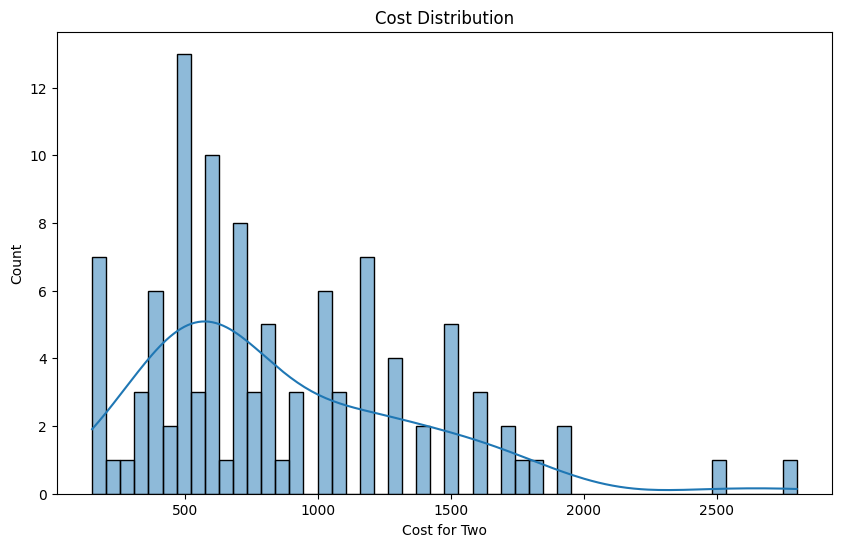

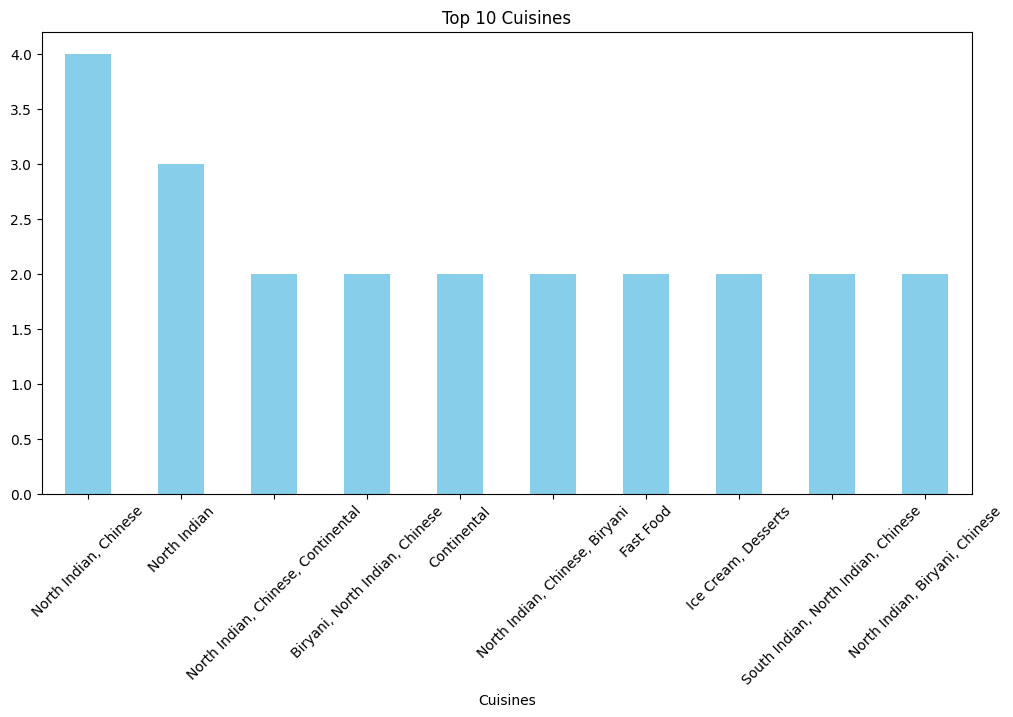

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cost distribution
plt.figure(figsize=(10,6))
sns.histplot(meta['Cost'], bins=50, kde=True)
plt.title('Cost Distribution')
plt.xlabel('Cost for Two')
plt.show()

# Top cuisines
plt.figure(figsize=(12,6))
meta['Cuisines'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Cuisines')
plt.xticks(rotation=45)
plt.show()

### Cost distribution Graph1
#### Most restaurants fall into the lower cost range (affordable to mid-range).
#### This highlights the diversity in pricing, catering to different customer segments.

### Top 10 cuisines Graph 2
#### North Indian and Chinese cuisines dominate the market.

In [16]:
print(reviews.columns)


Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [20]:
print(meta.columns)


Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Rating_x', 'Rating_y'],
      dtype='object')


## Hypothesis Testing

### Hypothesis 1: Does a higher cost imply a higher rating?
**Null Hypothesis (H₀):** There is no relationship between the cost of a restaurant and its rating.  
**Alternative Hypothesis (H₁):** There is a positive relationship between the cost of a restaurant and its rating.

To test this, we use Pearson Correlation Coefficient between `Cost` and `Rating`.


#### Feature Engineering for Clustering

In [21]:
if 'Rating_y' in meta.columns:
    meta['Rating'] = meta['Rating_y']  # take the one from reviews
    meta.drop(['Rating_x', 'Rating_y'], axis=1, inplace=True)
elif 'Rating' not in meta.columns:
    # If no rating after merge, fill with mean (fallback)
    meta['Rating'] = meta['Rating'].fillna(meta['Rating'].mean())

# Fill missing ratings
meta['Rating'] = meta['Rating'].fillna(meta['Rating'].mean())

# One-hot encode cuisines
meta['Cuisines'] = meta['Cuisines'].fillna('Unknown')
meta = pd.concat([meta, meta['Cuisines'].str.get_dummies(sep=', ')], axis=1)

# Prepare features for clustering
features = ['Cost', 'Rating'] + list(meta.columns[meta.columns.str.contains(', ')])
X = meta[features].fillna(0)

print("Features ready for clustering:", X.shape)

Features ready for clustering: (105, 2)


#### Preprocessing

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### KMeans Clustering

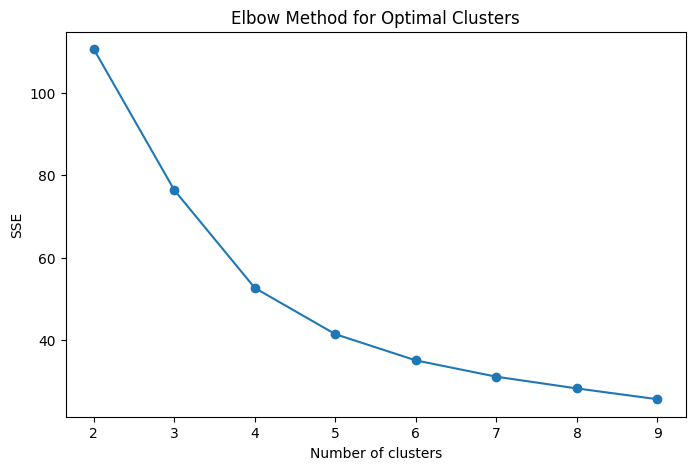

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Elbow Method
sse = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(2,10), sse, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Apply KMeans (choose k based on elbow plot, here k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
meta['Cluster'] = kmeans.fit_predict(X_scaled)

### Graph For number of clusters -
#### The elbow point appears around k = 4, so 4 clusters were chosen.This suggests that restaurants can be meaningfully grouped into four distinct categories based on cost, rating, and cuisines.


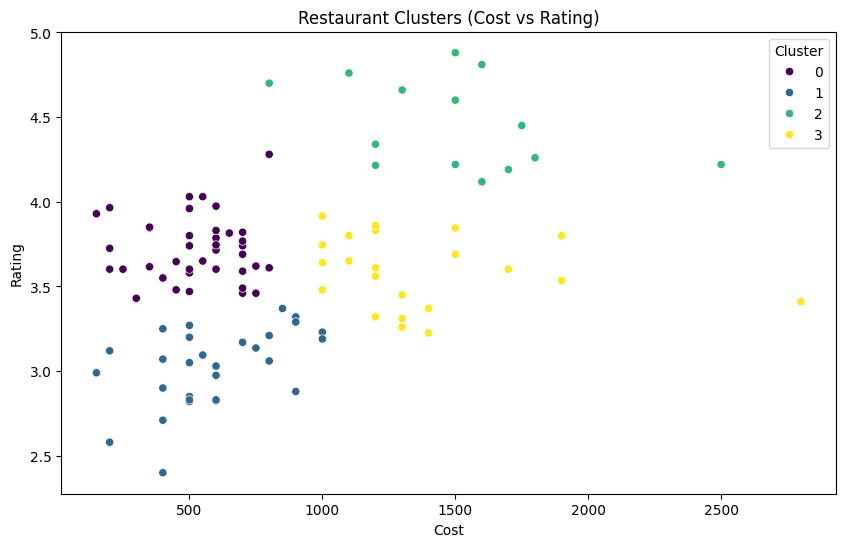

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=meta, x='Cost', y='Rating', hue='Cluster', palette='viridis')
plt.title('Restaurant Clusters (Cost vs Rating)')
plt.show()


 ### Restaurant Clusters (Cost vs Rating) Graph
 #### Cluster 0: Affordable restaurants with good ratings → Budget-friendly options.

####Cluster 2: Premium restaurants with highest ratings → Luxury fine dining.

####Cluster 1: Moderate cost with low ratings → Needs improvement.

####Cluster 3: High cost but average ratings → Possibly overpriced.

#### Sentiment Analysis

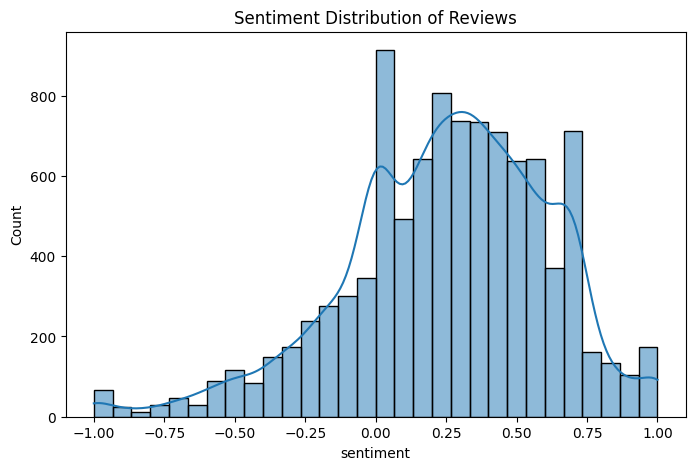

Positive Reviews: 7496, Negative Reviews: 1982, Neutral Reviews: 476


In [25]:
from textblob import TextBlob

# Compute sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

reviews['sentiment'] = reviews['Review'].apply(get_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(8,5))
sns.histplot(reviews['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution of Reviews')
plt.show()

# Positive, Negative, Neutral counts
pos = (reviews['sentiment'] > 0).sum()
neg = (reviews['sentiment'] < 0).sum()
neu = (reviews['sentiment'] == 0).sum()
print(f"Positive Reviews: {pos}, Negative Reviews: {neg}, Neutral Reviews: {neu}")

### Graph 5: Sentiment Distribution
#### Majority of reviews are positive (sentiment > 0), indicating overall customer satisfaction.Negative reviews exist, often related to delivery delays or service issues.

#### Insights

In [26]:
print("\nAverage Cost & Rating by Cluster:")
print(meta.groupby('Cluster')[['Cost','Rating']].mean())

print("\nNumber of restaurants in each cluster:")
print(meta['Cluster'].value_counts())

# Top cuisines per cluster
for cluster in meta['Cluster'].unique():
    top_cuisines = meta[meta['Cluster'] == cluster]['Cuisines'].value_counts().head(3)
    print(f"\nTop cuisines in Cluster {cluster}:")
    print(top_cuisines)


Average Cost & Rating by Cluster:
                Cost    Rating
Cluster                       
0         525.641026  3.720433
1         589.655172  3.022485
2        1510.000000  4.436176
3        1372.727273  3.586677

Number of restaurants in each cluster:
Cluster
0    39
1    29
3    22
2    15
Name: count, dtype: int64

Top cuisines in Cluster 0:
Cuisines
North Indian                      3
Ice Cream, Desserts               2
North Indian, Biryani, Chinese    2
Name: count, dtype: int64

Top cuisines in Cluster 2:
Cuisines
Biryani, North Indian, Chinese                              1
Asian, Mediterranean, North Indian, Desserts                1
Asian, Continental, North Indian, Chinese, Mediterranean    1
Name: count, dtype: int64

Top cuisines in Cluster 1:
Cuisines
North Indian, Chinese                                 2
Biryani, North Indian, Chinese, Seafood, Beverages    1
Street Food, North Indian, Fast Food                  1
Name: count, dtype: int64

Top cuisines in Clust

### Conclusion
#### This project demonstrates the power of data analytics and unsupervised machine learning in solving real-world business problems. By clustering restaurants and analyzing customer sentiments, Zomato can optimize restaurant recommendations, improve marketing strategies, and enhance customer satisfaction. Future improvements could involve building a recommendation system using collaborative filtering and deep learning models for more personalized experiences.